<a href="https://colab.research.google.com/github/JRose31/Spotify_Tree-Based-ML-Model/blob/main/Final_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Definition

Utilizing a Spotify Dataset containing data on charting songs, build a predictive model that is able to predict the popularity of a new song given certain features. While doing this, I'm also seeking to minimize my models RMSE(Root mean squared error).

## Collect/Load Data

With the data being provided, I'll load the file into my script.

In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np

# Read in data from file location
DataFrame = pd.read_csv('/drive/My Drive/Cohort_7/Projects/Project 3/Data/Project_3_Spotify.csv', index_col=0)

DataFrame.head()

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
Index,,,,,,,,,,,,,,,,,,,,,,
1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",2017-12-08,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],2021-07-09,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],2021-05-21,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",2021-06-25,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,98,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,2021-07-23--2021-07-30,96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


Now that I got an initial look at the data, I'll dive deeper into the dataset.

### Initial Exploration

Here, I'm seeking out information that'll be useful when either selecting features to include or in noting where the dataset requires cleaning.

In [ ]:
DataFrame.describe()

,Highest Charting Position,Number of Times Charted
count,1556.000000,1556.000000
mean,87.744216,10.668380
std,58.147225,16.360546
min,1.000000,1.000000
25%,37.000000,1.000000
50%,80.000000,4.000000
75%,137.000000,12.000000
max,200.000000,142.000000


*For cleaning:* Columns not returned from `DataFrame.describe()` are stored in datatypes that are not numerical

In [ ]:
DataFrame.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1556 entries, 1 to 1556
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Highest Charting Position  1556 non-null   int64 
 1   Number of Times Charted    1556 non-null   int64 
 2   Week of Highest Charting   1556 non-null   object
 3   Song Name                  1556 non-null   object
 4   Streams                    1556 non-null   object
 5   Artist                     1556 non-null   object
 6   Artist Followers           1556 non-null   object
 7   Song ID                    1556 non-null   object
 8   Genre                      1556 non-null   object
 9   Release Date               1556 non-null   object
 10  Weeks Charted              1556 non-null   object
 11  Popularity                 1556 non-null   object
 12  Danceability               1556 non-null   object
 13  Energy                     1556 non-null   object
 14  Loudness

Being returned all non-null values invites skepticism. With this dataset being smaller, visually scanning through the rows allowed me to extract the following.

---

For cleaning:
* Popularity: `0`, `' '` 
* Genre: `'[]'`
* Other  `' '` values
* Column datatype conversions

## Data Cleaning

Before manipulating the dataset, a copy is required as to maintain the integrity of the original dataset (for referencing).

In [ ]:
df = DataFrame.copy()
df.reset_index(inplace=True, drop=True)

Now I'll identify which rows either have null values or a `Popularity` of 0.

In [ ]:
drop_rows = []

for col in df.columns:
  if col == 'Popularity':
    for idx, val in enumerate(df[col]):
      if val in [' ', '0'] and idx not in drop_rows:
        drop_rows.append(idx)
  else:
    for idx, val in enumerate(df[col]):
      if val == ' ' and idx not in drop_rows:
        drop_rows.append(idx)

In [ ]:
len(drop_rows)

47

I'll check to see if these 47 rows are completely bad observations or have spots that we can save through a process like imputation.

In [ ]:
df.iloc[drop_rows,:]

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
35,36,1,2021-07-23--2021-07-30,NOT SOBER (feat. Polo G & Stunna Gambino),"11,869,336",The Kid LAROI,,,,,2021-07-23--2021-07-30,,,,,,,,,,,
163,5,39,2020-10-30--2020-11-06,34+35,"5,453,159",Ariana Grande,,,,,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,,,,,,,,,,,
464,118,1,2021-03-26--2021-04-02,Richer (feat. Polo G),"6,292,362",Rod Wave,,,,,2021-03-26--2021-04-02,,,,,,,,,,,
530,20,5,2021-01-15--2021-01-22,"34+35 Remix (feat. Doja Cat, Megan Thee Stalli...","6,162,453",Ariana Grande,,,,,2021-02-19--2021-02-26\n2021-02-12--2021-02-19...,,,,,,,,,,,
636,22,6,2020-12-18--2020-12-25,Driving Home for Christmas - 2019 Remaster,"8,804,531",Chris Rea,,,,,2020-12-25--2021-01-01\n2020-12-18--2020-12-25...,,,,,,,,,,,
654,73,1,2020-12-18--2020-12-25,Thank God It's Christmas - Non-Album Single,"10,509,961",Queen,,,,,2020-12-18--2020-12-25,,,,,,,,,,,
750,19,20,2020-07-31--2020-08-07,"Agua (with J Balvin) - Music From ""Sponge On T...","5,358,940",Tainy,,,,,2020-11-20--2020-11-27\n2020-11-13--2020-11-20...,,,,,,,,,,,
784,76,14,2020-09-04--2020-09-11,"Lean (feat. Towy, Osquel, Beltito & Sammy & Fa...","4,739,241","Super Yei, Jone Quest",,,,,2020-11-13--2020-11-20\n2020-11-06--2020-11-13...,,,,,,,,,,,
876,164,4,2020-09-18--2020-09-25,+Linda,"4,964,708",Dalex,,,,,2020-09-25--2020-10-02\n2020-09-18--2020-09-25...,,,,,,,,,,,
1140,131,1,2020-05-29--2020-06-05,In meinem Benz,"5,494,500","AK AUSSERKONTROLLE, Bonez MC",,,,,2020-05-29--2020-06-05,,,,,,,,,,,


With `Popularity` being the response variable to be measured, all observations with null or `0` values 
automatically bad. The other rows are also bad 
containing predominantly null values. Nothing gets saved here.

However, I'm able to fill in nulls for some genres by using genres from their other songs. 

In [ ]:
null_genres = []

for idx, val in enumerate(df['Genre']):
  if val == '[]':
    null_genres.append([df['Artist'].iloc[idx].split(', '), idx])

print(len(null_genres))
null_genres[:5]

75


[[['Bella Poarch'], 49],
 [['Marc Seguí', 'Rauw Alejandro', 'Pol Granch'], 51],
 [['João Gomes'], 56],
 [['Dua Lipa'], 65],
 [['Trinidad Cardona'], 66]]

Now I'll iterate over the artist and reference the entire dataframe to search for genres to use.

In [ ]:
for song in null_genres:
  for artist in song[0]:
    if df['Genre'].iloc[song[1]] != '[]': # If genre hasnt been filled already
      for idx, val in enumerate(df['Artist']):
        if artist == val and idx not in drop_rows:
          if df['Genre'].iloc[idx] != '[]':
            df['Genre'].iloc[song[1]] = df['Genre'].iloc[idx]


Any genre that didn't get a match gets tossed as well.

In [ ]:
for idx, val in enumerate(df['Genre']):
  if val == '[]' and idx not in drop_rows:
    drop_rows.append(idx)

len(drop_rows)

86

With `1,556` observations, `86` rows can be afforded to drop.

In [ ]:
df.drop(drop_rows, inplace = True)
df.reset_index(inplace = True, drop = True)

Next up in cleaning is dealing with the type conversions. This is made easy with the `ast` package. `ast.literal_eval` evaluates strings and converts them to their necessary data type. 

<sup>*conversions with ast.literal_eval are usefully limited to execution of data type conversions only.*</sup>

### Type Conversions

The conversions needed are:
* `Genre` from strings to lists
* `Release Date` from string to datetime object
* All numeric columns currently as string datatypes

In [ ]:
import ast

df['Genre'] = [ast.literal_eval(str(genre)) for genre in df['Genre']]
df['Release Date'] = pd.to_datetime(df['Release Date'])

for col in df.columns:
  try:
    if col == 'Streams':
      df[col] = [i.replace(',', '') for i in df[col]]
      df[col] = df[col].apply(pd.to_numeric)
    df[col] = df[col].apply(pd.to_numeric)
  except:
    pass

df.info();


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Highest Charting Position  1470 non-null   int64         
 1   Number of Times Charted    1470 non-null   int64         
 2   Week of Highest Charting   1470 non-null   object        
 3   Song Name                  1470 non-null   object        
 4   Streams                    1470 non-null   int64         
 5   Artist                     1470 non-null   object        
 6   Artist Followers           1470 non-null   int64         
 7   Song ID                    1470 non-null   object        
 8   Genre                      1470 non-null   object        
 9   Release Date               1470 non-null   datetime64[ns]
 10  Weeks Charted              1470 non-null   object        
 11  Popularity                 1470 non-null   int64         
 12  Dancea

### Feature Engineering

Moving on to further manipulating the `Genre` column, there are currently too many unique genres names to effectively train a model with. I'm trying to shrink that number of unique genres down.

In [ ]:
from collections import Counter

genres = []

for genre in df['Genre']:
  for idv in genre:
      genres.append(idv)

count_dict = dict(Counter(genres))
len(count_dict)

334

There are currently `334` unique genre names. What are the most popular ones?

In [ ]:
# Take a look at some popular genres
{ key: value for key, value in count_dict.items() if value > 50 }

{'atl hip hop': 53,
 'canadian pop': 85,
 'dance pop': 257,
 'electropop': 60,
 'german hip hop': 53,
 'hip hop': 151,
 'latin': 154,
 'melodic rap': 124,
 'pop': 485,
 'pop dance': 54,
 'pop rap': 164,
 'post-teen pop': 256,
 'rap': 310,
 'reggaeton': 157,
 'trap': 159,
 'trap latino': 155,
 'uk pop': 52}

Genres like pop, rap, trap, latino, and hip hop are popular.These are some of the genres I'll genrealize.

In [ ]:
pop_genres = ['pop rap', 'hip hop', 'r&b', 'trap', 'rap', 'rock', 'jazz', 'house', 'reggaeton',
              'wave', 'metal', 'drill', 'latino', 'soul', 'punk', 'funk', 'pop']

for idx, val in enumerate(df['Genre']):
  for i, v in enumerate(val):
    for genre in pop_genres:
      if genre in v:
        df['Genre'].iloc[idx][i] = genre
        break
      elif genre == 'pop': # Last condition didnt match, genre = other
        df['Genre'].iloc[idx][i] = 'other'

In [ ]:
genres = []

for genre in df['Genre']:
  for idv in genre:
      genres.append(idv)

count_dict = dict(Counter(genres))
len(count_dict)

18

Now the number of unqiue genres are cut from 334 to 18. This'll be much better training data for the model. One more thing to take care of is making sure that every songs has only one of each genre its in. (*Deleting duplicates*)

In [ ]:
df['Genre'].iloc[10]

['pop', 'pop', 'pop']

In [ ]:
df['Genre'] = [list(set(genres)) for genres in df['Genre']]

df['Genre'].iloc[10]

['pop']

## EDA/Visualization

Moving on to EDA(Exploratory Data Analysis) and Data Visualization, questions I'm exploring are:

---

What is the distribution of the response variable?

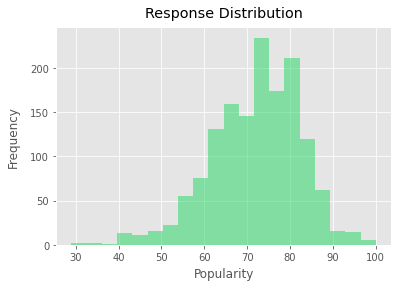

In [ ]:
plt.hist(df['Popularity'], bins=20, color = '#1ED760', alpha = 0.5)
plt.xlabel('Popularity', labelpad=5)
plt.ylabel('Frequency', labelpad=10)
plt.title('Response Distribution', pad=10);

Most observed popularities seem to be between the ranges of 60-90. Keeping this in mind, the model might not be so great at predicting lower popularities.

---

What is the distribtion of `Release Dates`?

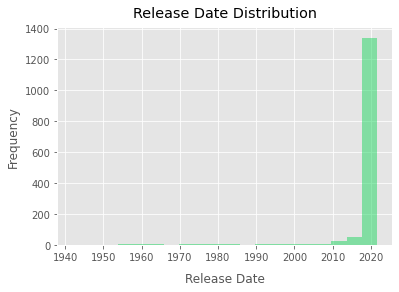

In [ ]:
plt.hist(df['Release Date'], bins=20, color='#1ED760', alpha = 0.5)
plt.xlabel('Release Date', labelpad=10)
plt.ylabel('Frequency', labelpad=5)
plt.title('Release Date Distribution', pad=10);

Most songs observed were released past 2015. This is good to know when answering the next question.

---

How have streams contriubted tp a songs popularity over time? (*Most data is from songs in around 2018 and up.*)

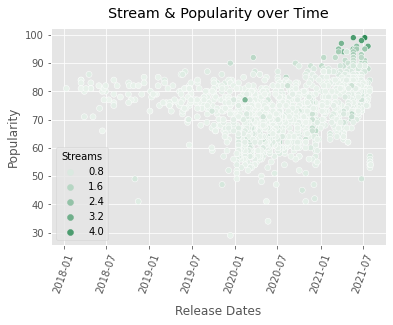

In [ ]:

current_songs = df.loc[df['Release Date'] > pd.Timestamp('2018-01-01T12')].copy()
current_songs['Streams'] = [round(i, -6) for i in current_songs['Streams']]

sns.scatterplot(data=current_songs, x='Release Date', y='Popularity', hue='Streams', palette=sns.light_palette("seagreen", as_cmap=True))
plt.title('Stream & Popularity over Time', pad=10)
plt.xticks(rotation=70)
plt.ylabel('Popularity', labelpad=5)
plt.xlabel('Release Dates', labelpad=10);

While more popular songs tend to have more streams, this relationship doesn't develop until popularity starts to go above 80. Also, most high streams and high popularity songs happened around the summer of 2021.

---

Do higher charting songs chart more often?

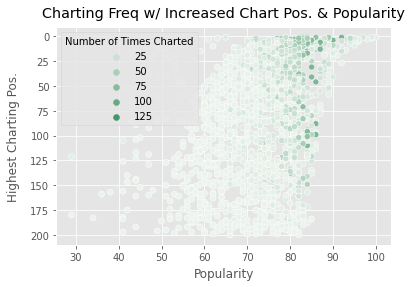

In [ ]:
sns.scatterplot(data=df, x='Popularity', y='Highest Charting Position', hue='Number of Times Charted', palette=sns.light_palette("seagreen", as_cmap=True))
plt.gca().invert_yaxis()
plt.title('Charting Freq w/ Increased Chart Pos. & Popularity', pad=10)
plt.ylabel('Highest Charting Pos.', labelpad=10)
plt.xlabel('Popularity', labelpad=5);

Higher charting songs seem to chart more frequently, but this trend doesnt hold well past popularity of approx 85.

### Drop Irrelevant Predictors 

These are predictors that either wouldnt be measured for a new song or that doesn't add value to the model.

In [ ]:
drop_pred = ['Song Name', 'Artist', 'Highest Charting Position', 'Number of Times Charted',
                'Week of Highest Charting', 'Streams', 'Song ID', 'Weeks Charted']

working_df = df.drop(drop_pred, axis=1)

## Data Processing

Processing the data before splitting up training and testing sets, I'm splitting up the data into seperate dataframes for encoding.

### Encoding

In [ ]:
num_cols = working_df.select_dtypes(exclude= 'object')
cat_cols = working_df.select_dtypes(include= 'object')

`Genre` and `Chord` can both be One-Hot encoded as is.

In [ ]:
df_genre = cat_cols['Genre'].str.join('|').str.get_dummies()
df_chord = cat_cols['Chord'].str.get_dummies(" ")

Realizing that 1. The high range of dates makes for heavy outliers and 2. Measuring the time of year the song was released vs the exact year the song was released gives a better prediction. While a song can be released in a certain month to help boost popularity, time travel to release a song back in time just isn't a thing yet. Or is it?

In [ ]:
df_release = pd.get_dummies(pd.DatetimeIndex(num_cols['Release Date']).month, prefix = 'mo')
num_cols.drop('Release Date', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Check new column count to make sure encoding went through well.

In [ ]:
final_df = pd.concat([num_cols, df_genre, df_chord, df_release], axis = 1)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 53 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist Followers  1470 non-null   int64  
 1   Popularity        1470 non-null   int64  
 2   Danceability      1470 non-null   float64
 3   Energy            1470 non-null   float64
 4   Loudness          1470 non-null   float64
 5   Speechiness       1470 non-null   float64
 6   Acousticness      1470 non-null   float64
 7   Liveness          1470 non-null   float64
 8   Tempo             1470 non-null   float64
 9   Duration (ms)     1470 non-null   int64  
 10  Valence           1470 non-null   float64
 11  drill             1470 non-null   int64  
 12  funk              1470 non-null   int64  
 13  hip hop           1470 non-null   int64  
 14  house             1470 non-null   int64  
 15  jazz              1470 non-null   int64  
 16  latino            1470 non-null   int64  


Splitting up the data into predictors (`X`) and response (`y`).

In [ ]:
X = final_df.drop(['Popularity'], axis = 1)
y = final_df['Popularity']

### Fit Decision Tree

Fitting a Decision Tree Regressor model, I'll fit, train, and test the model a number of times to get the cross validated RMSE. 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import datetime as dt  

numLoops = 500

rms_error = np.zeros(numLoops)

for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
  #https://stackoverflow.com/questions/60049059/python-linear-regression-typeerror-invalid-type-promotion
  #X_test['Release Date'] = pd.to_datetime(X_test['Release Date'])
  model = DecisionTreeRegressor(max_depth=3) # Arbitrarily choosing max_depth of 3
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  rms_error[idx] = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"CV RMSE: {rms_error.mean().round(2)}")

CV RMSE: 10.14


A RMSE of approx 10.14 isn't too bad, but I've yet to optimize the models max depth parameter.

#### Optimal Max Depth

Optimizing the models max depth parameter, I'm getting a cross validated RMSE for various depths, visualizing the results, and identifying the optimal max depth for this specific model.

In [ ]:
max_depths = [1,2,3,4,5,6,7,8,9,10]

rms_depth = np.zeros(len(max_depths))

for n, depth in enumerate(max_depths): 
  rms_error = np.zeros(numLoops)

  for idx in range(0,numLoops):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    rms_error[idx] = np.sqrt(mean_squared_error(y_test, y_pred))

  rms_depth[n] = rms_error.mean()

With a list of specified depths and cross validated RMSEs for each, visualizing the results gives a clear picture for the optimal max depth.

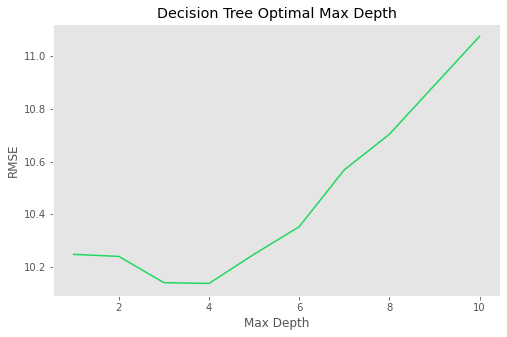

In [ ]:
# Plot result
plt.figure(figsize = (8,5))
plt.plot(max_depths, rms_depth, color = '#1ED760')
plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.title('Decision Tree Optimal Max Depth')
plt.grid()

Rerunning with a max-depth of 3 should yeild the best results.

In [ ]:
# Re run with max depth = 3
numLoops = 500

rms_error = np.zeros(numLoops)

for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

  model = DecisionTreeRegressor(max_depth=3) 
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)

  rms_error[idx] = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"CV RMSE: {rms_error.mean().round(2)}")
dtree_rmse = rms_error.mean().round(2)

CV RMSE: 10.12


Not a huge imporvement but when optimizing through tuning parameters, improvement is improvement.

Now, I'll visualize the distrbition of the RMSE through my cross-validation to make sure the range isn't too high or something weird isnt going on with the distribution of results.

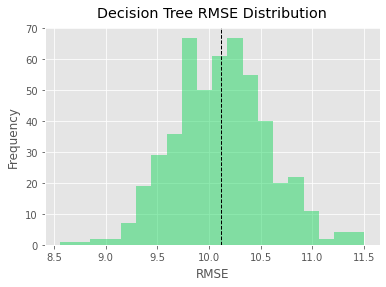

In [ ]:
plt.hist(rms_error, bins=20, color='#1ED760', alpha = 0.5)
plt.xlabel('RMSE', labelpad=5)
plt.ylabel('Frequency', labelpad=5)
plt.title('Decision Tree RMSE Distribution', pad=10)
plt.axvline(rms_error.mean(), color='k', linestyle='dashed', linewidth=1);

Results seem pretty normally distributed being centered towards that optimized RMSE.

## Performance Analysis

Analyzing the visual representation of the decision tree provides more insight into how the model is making its predictions.

In [ ]:
# Install dtreeviz package
!pip3 install dtreeviz

     |████████████████████████████████| 61 kB 506 kB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.1-py3-none-any.whl size=67694 sha256=176483b152a16af4e69515652b5b422d864a3fdf604112327eff51c6cd7c9300
  Stored in directory: /root/.cache/pip/wheels/f4/e0/4c/26144f03fd05b7c3d82e5cf2679c2d6bd9d9b730548264674d
Successfully built dtreeviz


I'll make a guess on the first item in the testing set and compare that to its actual value.

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


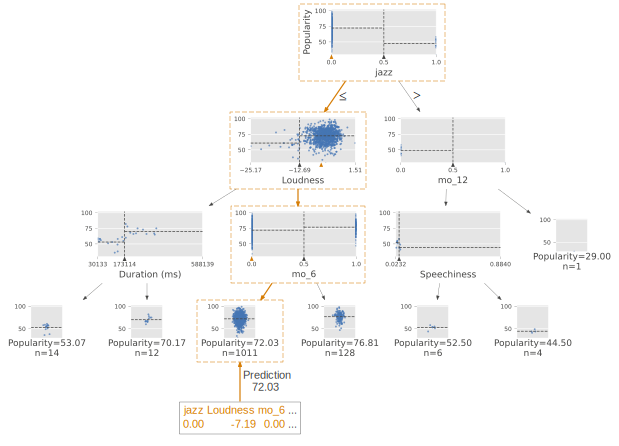

In [ ]:
from dtreeviz.trees import dtreeviz

# Show prediction for first song in X_test
dtreeviz(model, X_train, y_train, target_name='Popularity', feature_names=X.columns, X=X_test.iloc[0])  

*Output varies so speaking through selected features split on will be in vain.*

In [ ]:
y_test.iloc[0]

77

While a RMSE of approx 10.12 isn't bad, looking at a plot of the residuals provides more insight into what that number represents.

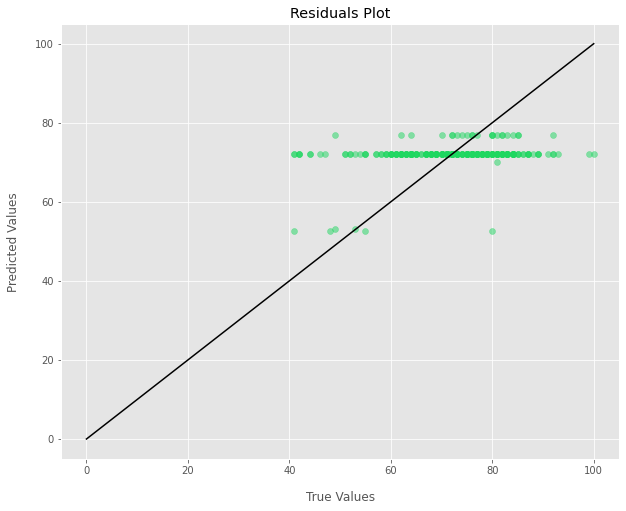

In [ ]:
dtree_y_test = y_test
dtree_y_pred = y_pred

# Generate figure of predicted vs actual results
fig = plt.figure(figsize=(10, 8))

# Plot True vs Predicted
plt.scatter(y_test, y_pred, alpha = 0.5, c= '#1ED760')

# Plot line to visualize residuals
p1 = max(y_pred.max(), y_test.max())
plt.plot([0, p1],[0, p1], c='black')

plt.title('Residuals Plot')
plt.xlabel('True Values', labelpad=15)
plt.ylabel('Predicted Values', labelpad=15);

This model seems to be predicting values in 3 small ranges. Before manipulating data further to improve this, I'll try out two other models and assess their performance against this Decision Tree Regressor model. 

### Random Forest

Next, this random forest regressor adds in another factor of having multiple decision trees and either voting on the best result or averaging the results to get a genrally more accurate prediction compared to the Decision Tree Regressor. With this, before any tuning of parameters, I expect Random Forest to do better than the Decision Tree Regressor model.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# two parameters - n_estimators (number of trees), max_depth (number of splits)
numLoops = 500

mean_error = np.zeros(numLoops)

for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
  model = RandomForestRegressor(n_estimators = 10, random_state=0) #n_estimators is number of trees in forest. Note: you can also choose max_depth for RFs
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  mean_error[idx] = mean_squared_error(y_test, y_pred)

print(f'RMSE: {np.sqrt(mean_error.mean())}')

RMSE: 9.795915076034028


ALready a lower RMSE. This can be lowered further by optimizing the number of decision trees included in the model.

#### Optimal Trees


Here I'm going through a process similar to finding the optimal max depth of the Decision Tree Regressor model above. In this case however, multiple number of decision trees are being tested in this case so a longer run time is to be expected.

In [ ]:
num_trees = range(10, 60, 10)
cv_loops = 100
rmse_results = np.zeros(len(num_trees))

for n, trees in enumerate(num_trees):
  rmse_cv = np.zeros(cv_loops)
  for i in range(cv_loops):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
    rfModel = RandomForestRegressor(n_estimators=trees, random_state=0)
    rfModel.fit(X_train, y_train)
    y_pred_rf = rfModel.predict(X_test)
    rmse_cv[i] = np.sqrt(mean_squared_error(y_test, y_pred_rf))

  print(trees,' trees finished.')
  rmse_results[n] = rmse_cv.mean()

10  trees finished.
20  trees finished.
30  trees finished.
40  trees finished.
50  trees finished.


Now visualizing those results to get the optimal number of decision trees that'll yeild the lowest RMSE.

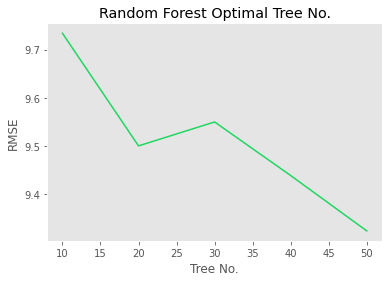

In [ ]:
plt.plot(num_trees, rmse_results, color = '#1ED760')
plt.xlabel('Tree No.')
plt.ylabel('RMSE')
plt.title('Random Forest Optimal Tree No.')
plt.grid()

In [ ]:
print(f'RMSE with 50 trees: {rmse_results[-1]}')
rf_rmse = rmse_results[-1]

RMSE with 50 trees: 9.323548208514474


Again, I'll re-run this model, specifying the optimal number of tress, assess the RMSE returned and visualize the residuals.

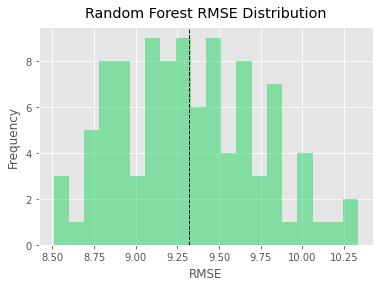

In [ ]:
cv_loops = 100
rmse_cv = np.zeros(cv_loops)
for i in range(cv_loops):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
  rfModel = RandomForestRegressor(n_estimators=num_trees[-1], random_state=0)
  rfModel.fit(X_train, y_train)
  y_pred_rf = rfModel.predict(X_test)
  rmse_cv[i] = np.sqrt(mean_squared_error(y_test, y_pred_rf))

plt.hist(rmse_cv, bins=20, color = '#1ED760', alpha = 0.5)
plt.xlabel('RMSE', labelpad=5)
plt.ylabel('Frequency', labelpad=5)
plt.title('Random Forest RMSE Distribution', pad=10)
plt.axvline(rmse_cv.mean(), color='k', linestyle='dashed', linewidth=1);

The distribution of the RMSE for this Random Forest Regressor model are pretty even.

#### Random Forest Performance Analysis

Moving on to further understanding what the RMSE means for this model, I'll visualize the residuals, keeping in mind the Decision Tress Regressor models output.

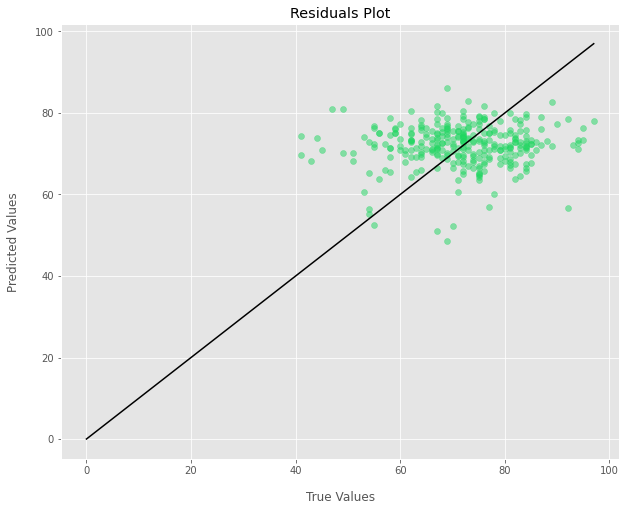

In [ ]:
rf_y_test = y_test
rf_y_pred = y_pred
# Generate figure of predicted vs actual results
fig = plt.figure(figsize=(10, 8))

# Plot True vs Predicted
plt.scatter(y_test, y_pred, alpha = 0.5, c= '#1ED760')

# Plot line to visualize residuals
p1 = max(y_pred.max(), y_test.max())
plt.plot([0, p1],[0, p1], c='black')

plt.title('Residuals Plot')
plt.xlabel('True Values', labelpad=15)
plt.ylabel('Predicted Values', labelpad=15);

Definintely better this time. While the residuals still dont quite follow the line well, the model seems to be predicting continuous values now.

With the Random Forest Regressor, the importance of features can be returned.

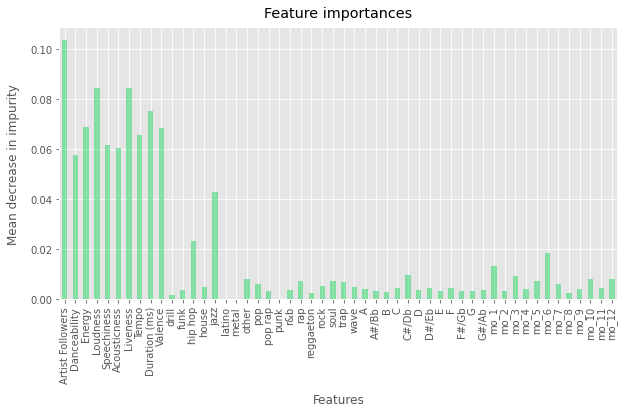

In [ ]:
importances = rfModel.feature_importances_
forest_importances = pd.Series(importances, index=X.columns)

plt.figure(figsize=(10, 5))
forest_importances.plot.bar(color='#1ED760', alpha=0.5)
plt.title("Feature importances", pad=10)
plt.ylabel("Mean decrease in impurity", labelpad=10)
plt.xlabel('Features', labelpad=10);

For this specific model, it seems as if Artist Followers and Loudness are two of the most important features.

---

Lastly, I'll explore an XGBoost model and compare it's performance to the previous 2.

### XGBoost

With XGBoost, I'll run the model originally to see what cros validated RMSE is returned. The  again, I'll tune some hyperparameters of the model (one of XGBoosts advantages over Random Forest), and rerun the model with the optimal hyperparameters.

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

numLoops = 100
mse_xgb  = np.zeros(numLoops)

for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
  xgbr = xgb.XGBRegressor(objective ='reg:squarederror', verbosity=0, seed = 10)
  xgbr.fit(X_train,y_train)
  y_pred_xgb = xgbr.predict(X_test)
  mse_xgb[idx] = mean_squared_error(y_test,y_pred_xgb)


print(f'RMSE: {np.sqrt(mse_xgb.mean())}')

RMSE: 9.694005437620037


Better that the Decision Trees Regressor but worse than the unoptimized Random Forest Regressor (*but close*)

Rerunning the model through a cross valideaed grid search with specified parameters for testing returns the optimal hyperparameters.

#### Tune Parameters

In [ ]:
# Specify the parameters you want to try and their ranges. 
param_test = {
 'max_depth':[3,4,5,6,7],
 'learning_rate' : [0.1, 0.2, 0.3, 0.4], 
 'n_estimators': [20,40,60,80,100,120,140],
}

# Perform the grid search
gsearch = GridSearchCV(estimator = xgb.XGBRegressor(objective = 'reg:squarederror', seed = 10), 
 param_grid = param_test, scoring='neg_mean_squared_error', cv=5)

# Fit to training data 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15)
model = gsearch.fit(X_train,y_train)

# See grid search results
print(model.best_params_)

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 120}


Now I'll use these hyperparameters to tune the model to yeild its best RMSE.

In [ ]:
numLoops = 100
mse_xgb  = np.zeros(numLoops)

for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15)
  xgbr = xgb.XGBRegressor(objective ='reg:squarederror', verbosity=0, 
                          learning_rate = 0.1, max_depth = 5, n_estimators = 120, seed = 10)
  xgbr.fit(X_train,y_train)
  y_pred = xgbr.predict(X_test)
  mse_xgb[idx] = np.sqrt(mean_squared_error(y_test,y_pred))

print(f'RMSE: {mse_xgb.mean()}')
xgb_rmse = mse_xgb.mean()

RMSE: 9.433535541402298


And one last time, I'll visualize the distribution of the RMSE for the tuned hyperparameter version, and then residuals.

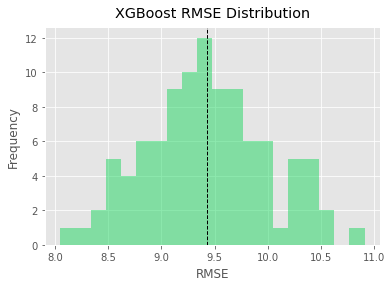

In [ ]:
plt.hist(mse_xgb, bins=20, color='#1ED760', alpha = 0.5)
plt.xlabel('RMSE', labelpad=5)
plt.ylabel('Frequency', labelpad=5)
plt.title('XGBoost RMSE Distribution', pad=10)
plt.axvline(mse_xgb.mean(), color='k', linestyle='dashed', linewidth=1);

Performance seem to be similar to Random Forest Regressor but with a slightly highetr range of cross validated RMSEs.

#### XGBoost Performance Analysis

Diving deeper with the residulas plot.

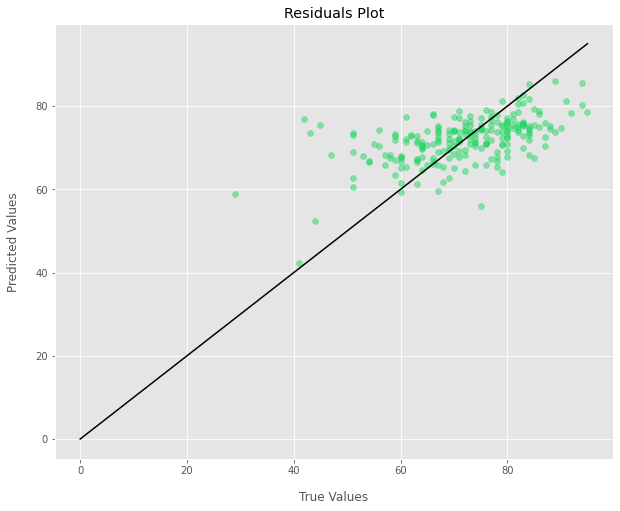

In [ ]:
xgb_y_test = y_test
xgb_y_pred = y_pred

# Generate figure of predicted vs actual results
fig = plt.figure(figsize=(10, 8))

# Plot True vs Predicted
plt.scatter(y_test, y_pred, alpha = 0.5, c= '#1ED760')

# Plot line to visualize residuals
p1 = max(y_pred.max(), y_test.max())
plt.plot([0, p1],[0, p1], c='black')

plt.title('Residuals Plot')
plt.xlabel('True Values', labelpad=15)
plt.ylabel('Predicted Values', labelpad=15);

The residuals for this model seem to begin falling more along the line compared to the Randome Forest Regressor.

## Final Analysis

Now comparing not only the RMSE of the models, but the visualization of their residuals whilst keeping in mind differences in distrbution, there has to be a best model.

In [ ]:
pip install --upgrade matplotlib

     |████████████████████████████████| 10.3 MB 4.2 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


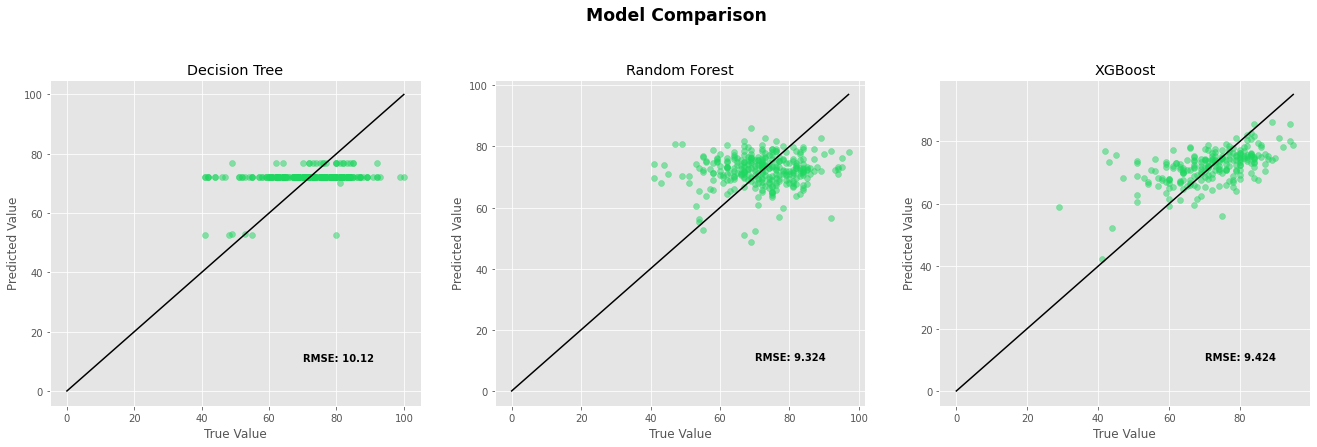

In [ ]:
# Generate figure of predicted vs actual results
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Plot True vs Predicted
ax1.scatter(dtree_y_test, dtree_y_pred, alpha = 0.5, c= '#1ED760')
# Plot line to visualize residuals
p1 = max(dtree_y_pred.max(), dtree_y_test.max())
ax1.plot([0, p1],[0, p1], c='black')
ax1.set_title('Decision Tree')
ax1.set_xlabel('True Value')
ax1.set_ylabel('Predicted Value')
ax1.text(70, 10, 'RMSE: '+ str(round(dtree_rmse, 3)), fontweight='semibold')

# Plot True vs Predicted
ax2.scatter(rf_y_test, rf_y_pred, alpha = 0.5, c= '#1ED760')
# Plot line to visualize residuals
p2 = max(rf_y_pred.max(), rf_y_test.max())
ax2.plot([0, p2],[0, p2], c='black')
ax2.set_title('Random Forest')
ax2.set_xlabel('True Value')
ax2.set_ylabel('Predicted Value')
ax2.text(70, 10, 'RMSE: '+ str(round(rf_rmse, 3)), fontweight='semibold')

# Plot True vs Predicted
ax3.scatter(xgb_y_test, xgb_y_pred, alpha = 0.5, c= '#1ED760')
# Plot line to visualize residuals
p3 = max(xgb_y_pred.max(), xgb_y_test.max())
ax3.plot([0, p3],[0, p3], c='black')
ax3.set_title('XGBoost')
ax3.set_xlabel('True Value')
ax3.set_ylabel('Predicted Value')
ax3.text(70, 10, 'RMSE: '+ str(round(xgb_rmse, 3)), fontweight='semibold')

plt.subplots_adjust(right=1)
fig.suptitle('Model Comparison', fontsize='xx-large', fontweight='bold', x=0.56, y=1.05);

While there is a best model, best isn't always that much better than 2nd best. Going with Random Forest rgeressor heavily based upon it's smaller range in comparison to the range of cross validated RMSEs for XGBoost (*and slightly lower mean cv RMSE*), XGBoost isn't far behind. This is especially true when considering how the residuls for the XGBoost model falls more along the line of true predictions with an only slighlty higher mean CV RMSE.

### Next Steps...

I am curious to see how well these model perform with a dataset with popularities evenly distributed. With this current dataset however, changes I would've made are:
* Incoorporate a better feature engineering for genres
* Include Artist name (predicting popularity of a new song from that artist)

#### References

* https://medium.com/geekculture/xgboost-versus-random-forest-898e42870f30
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
* https://seaborn.pydata.org/tutorial/color_palettes.html?highlight=hue
* https://seaborn.pydata.org/generated/seaborn.pairplot.html
* https://towardsdatascience.com/how-to-use-your-own-color-palettes-with-seaborn-a45bf5175146